### Question
__How does location and educational level affect wages and unemployment rate?__ <br>

_Three-part Query_ <br>
We are looking at the wages and unemployment rates to find out how the location (provinces in Canada) and educational level affect the average wages and unemployment rates to see the differences based on a persons location and education level.<br><br>
_KWL_ 
- We __know__ that educational levels generally lead to higher wages 
- We __want__ to learn how a province affects average wage and unemployment rate
- We __want__ to learn if average wages are interconnected with unemployement rate
- We __have__ learned that average wage/unemployment rate is affected by education levels and location 


### Data
We will be using data from the __[Government of Canada](https://open.canada.ca/en/open-data)__

#### Datasets
In the folder 'data' 
- nocskill_an.csv https://open.canada.ca/data/en/dataset/49cdedd5-41ed-4a76-a3c7-69d27f68be2b
- v0913_05.csv https://open.canada.ca/data/en/dataset/1f14addd-e4fc-4a07-9982-ad98db07ef86

### Processing the data and visualizations

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Average Hourly Wage per Education Level in 2019


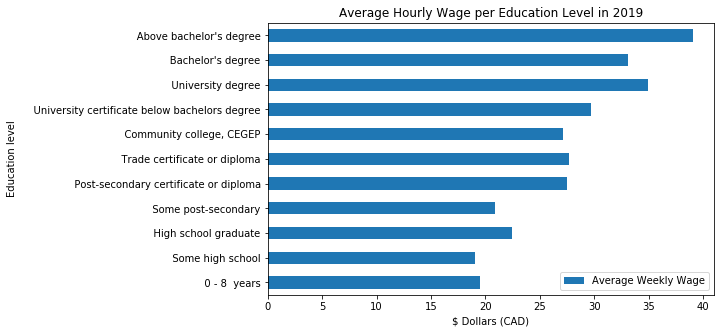

In [10]:
df2 = pd.read_csv('data/v0913_05.csv')
location_condition = df2['Geography'] == "Canada"
year_condition = df2['YEAR'] == 2019
wage_condition = df2["Wages"] == "Average hourly wage rate"
type_condition = df2["Type of work"] == "Both full- and part-time"
age_condition = df2["Age group"] == "15 years and over "
temp = df2.loc[location_condition & year_condition & wage_condition & type_condition & age_condition]
l = ['Total, all education levels','PSE  (5,6,7,8,9))','No PSE  (0,1,2,3,4)']
temp = temp[~temp['Education level'].isin(l)]
education_df = temp[['Education level','Both Sexes']]
education_df.columns = ["Education level","Average Weekly Wage"]
education_df.set_index("Education level", drop = True, inplace = True)
graph = education_df.plot.barh(title = "Average Hourly Wage per Education Level in 2019",figsize=(8,5))
graph = graph.set(xlabel="$ Dollars (CAD)")

### Analysis

Based on using KWL analysis, it is expected that a person's average hourly wage is greater based on their education level. In the graph above, we graphed 11 different education levels compared to the average hourly wages of citizens in Canada in 2019 (the most recent data updated by the Government of Canada) to show the trend. The graph followed an upward trend where a higher education lead to higher wages, showing a direct relationship between the two. Using this knowledge, we wanted further analysis on how different educations and locations within Canada.

### Unemployment Rate based on Education Level from 2015-2019

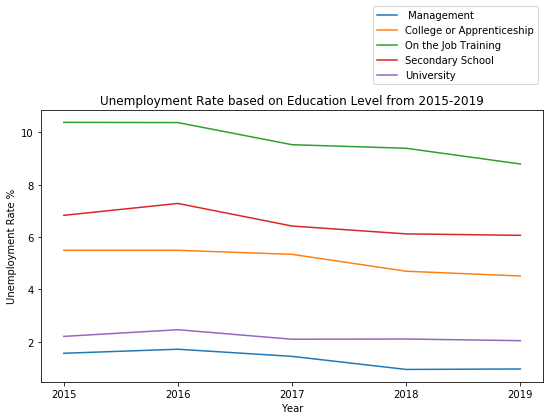

In [11]:
df1 = pd.read_csv('data/nocskill_an.csv', usecols=["Timeseries","OCCUPATION","Unemployment rate"])
df1 = df1.loc[(df1['Timeseries'] >= 2015) & (df1['Timeseries'] <= 2019)]
df1 = df1.copy()
df1.drop(index=df1[df1['OCCUPATION'] == "Total, all occupations - All skills level"].index, inplace=True)
df1.drop(index=df1[df1['Unemployment rate'] == 100].index, inplace=True)
df1.set_index("Timeseries", drop = True, inplace = True)
df1['OCCUPATION'].replace({"Management":"Management",
                   "Professional: occupations usually require university education":"University",
                   "NOC skill level B: occupations usually require college education or apprenticeship training":"College or Apprenticeship",
                   "NOC skill level C: occupations usually require secondary school and/or occupation-specific training":"Secondary School",
                   "NOC skill level D: on-the-job training is usually provided for these occupations":"On the Job Training"},inplace = True)
temp = df1.pivot_table('Unemployment rate', ['Timeseries'], 'OCCUPATION')
fig, ax = plt.subplots()
ax = temp.plot(figsize=(9,5),title="Unemployment Rate based on Education Level from 2015-2019",ax=ax)
newGraph = ax.set_xticks([2015,2016,2017,2018,2019])
newGraph= ax.set(xlabel="Year", ylabel="Unemployment Rate %")
newGraph = ax.legend(bbox_to_anchor=(1, 1.4))

### Analysis
To confirm that education level plays a role in a person's wage, we looked into how unemployment rates are affected as well. Although we knew that wages are directly affected, we wanted to learn how unemployement rates were changed. Unemployment can directly affect the economy and can influence what people choose on their post graduate option as specialization of occupation becomes more and more prevalent. Above, is a timeseries graph from 2015 to 2019 (the most recent data updated by the Government of Canada) to analyze how unemployment rates have been changing based on education levels over the years. As suspected, the unemployment rates are lower, the higher the education level and vice versa. We found that the unemplyoment rates between 2015-2019 based on educational level didn't change much and always stay in the same order of highest education level to lowest. This shows an established connection between unemployment rates and hourly wages as we could potentially say that higher wages are likely to lead to less unployment.

### Unemployment Rate per Province in 2019

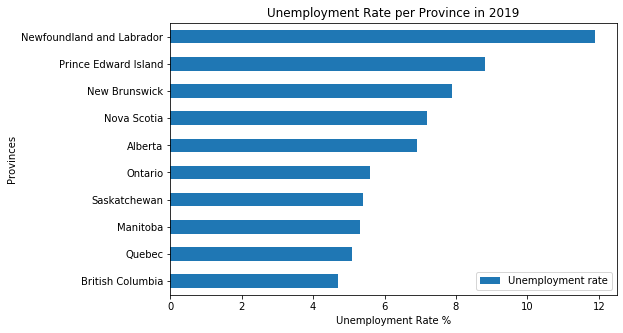

In [12]:
df1 = pd.read_csv('data/nocskill_an.csv')
year_condition = df1['Timeseries'] == 2019
occupation_condition = df1['OCCUPATION'] == "Total, all occupations - All skills level"
temp = df1.loc[year_condition & occupation_condition]
temp = temp.copy()
temp.drop(index=temp[temp['Prov'] == "Canada"].index, inplace=True)
unemployment_df = temp[['Prov','Unemployment rate']]
unemployment_df = unemployment_df.sort_values(by=['Unemployment rate'])
unemployment_df.set_index("Prov", drop = True, inplace = True) 
graph = unemployment_df.plot.barh(title = "Unemployment Rate per Province in 2019",figsize=(8,5))
graph = graph.set(xlabel="Unemployment Rate %",ylabel="Provinces")

### Analysis
The first two graphs showed interesting data in Canada, and we wanted to delve a further analysis into location to breakdown where unemployment happens the most. This is important based on our established connection we drew earlier. There are an adbundment amount of reasons that play into a specific provinces workforce, however the goal of the graph was to see how an unemployment rate is affected by location. The graph showed us that within Canada, depending on the province the unemployment rate in 2019 were drastically different from each other, which from what we learned, could potentially mean lower average wages.

### Average Hourly Wage in each Province based on Education Level in 2019

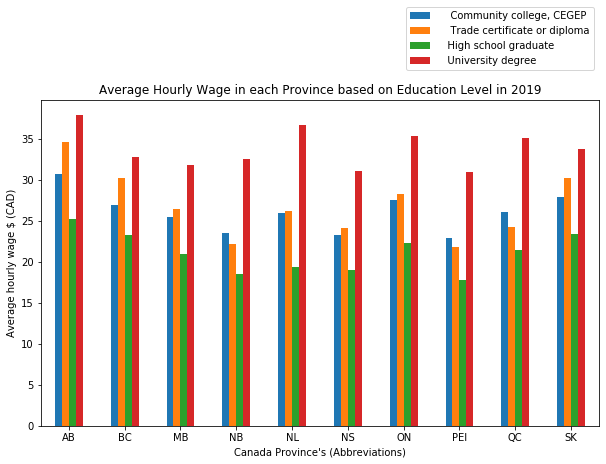

In [13]:
df2 = pd.read_csv('data/v0913_05.csv')
year_condition = df2['YEAR'] == 2019
wage_condition = df2["Wages"] == "Average hourly wage rate"
type_condition = df2["Type of work"] == "Both full- and part-time"
age_condition = df2["Age group"] == "15 years and over "
temp = df2.loc[year_condition & wage_condition & type_condition & age_condition]
new_df = temp[['Geography','Education level','Both Sexes']]
new_df = new_df.copy()
new_df.drop(index=new_df[new_df['Geography'] == "Canada"].index, inplace=True)
new_df['Education level'] = new_df['Education level'].str.replace(r"[\"\']", '')
l = ['Total, all education levels','   0 - 8  years','   Some high school', '   Some post-secondary', '   Post-secondary certificate or diploma','    University certificate below bachelors degree', '      Bachelors degree', '      Above bachelors degree','PSE  (5,6,7,8,9))','No PSE  (0,1,2,3,4)']
df = new_df[~new_df['Education level'].isin(l)]
df = df.copy()
df['Geography'] = df['Geography'].replace({'Newfoundland and Labrador':'NL',
                                          'Prince Edward Island':'PEI',
                                          'Nova Scotia':'NS',
                                          'New Brunswick':'NB',
                                          'Quebec':'QC',
                                          'Ontario':'ON',
                                          'Manitoba':'MB',
                                          'Saskatchewan':'SK',
                                          'Alberta':'AB',
                                          'British Columbia':'BC'})
df.set_index("Geography", drop = True, inplace = True)
temp = df.pivot_table('Both Sexes', ['Geography'], 'Education level')
fig, ax = plt.subplots()
graph = temp.plot.bar(figsize=(10,6),title="Average Hourly Wage in each Province based on Education Level in 2019", rot=0, ax=ax)
newGraph= ax.set(xlabel="Canada Province's (Abbreviations)", ylabel="Average hourly wage $ (CAD)")
newGraph = ax.legend(bbox_to_anchor=(1, 1.3))

### Analysis
In the final part of the KWL analysis, we learned a couple consistencies proved by our previous graphs and also some new information. Picking the 4 most common and disperse education levels, we graphed a multi bar graph into these categories: High School, Trade Certificate, College, University. Part of the decision is also because it is standard for Ontario to pick these 4 opportunities post graduate. As expected, university gives a higher average wage because it requires further specialization in a field and more long term study. On other side of the spectrum, a high school graduate incurs the lowest average hourly wage since they require no further specialization nor investment to study. The interesting thing is the college and trade graduates have fluctuating results based on provincial location. It could be due to the area and what work is required, and further analysis could draw a resemblance to higher unemployment when the two graduate options have a lower average wage with college being relatively higher than trades (see NB, PEI and QC following these exact traits we have mentioned and these 3 provinces also having the highest employment rate from our "Unemployment Rate perProvince in 2019" above). Learning these data could help us tackle unemployment rate and enact better policies for wages based on education.

### Conclusion
Overall, we learned that location and education level have an affect on the wages and unemployment rates within Canada. To summarize, from our KWL statement above:
- we __know__ and proved how education levels affect wages
- we __wanted__ to learn how unemployment rates are affected by education levels
- we __wanted__ to learn how location (provinces) affects average wage and unemployment rate
- we __learned__ that educational levels are interconnected with wages and unemployment rate
- we __learned__ that location has an affect on unemployment rates, but had the same trend for wages based on education level

In conclusion, we answered our question by examining different aspects of how location and educational level affect both factors and found that they effectively expanded on facts we already knew about the workforce/economy. 
